# **Data Mining - Class Assignment W06 Random Forest and GBoost**

## Group 20:
- ### Varrel Tjandra - 0706022310017
- ### M. Ilham Fadhilah Wirayudha - 0706022310062


### Import Libraries

In [28]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset

In [29]:
# load dataset
pd.set_option('display.max_columns', None) # Display all columns

url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/Bank%20(1).csv"
df = pd.read_csv(url,sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [30]:
# get info from dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [31]:
# get statistical info from dataset
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


<br>

# **Part A – Data Preprocessing and EDA**

### Handle Missing or Inconsistent Values

In [32]:
# show unique values from dataset
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'age': array([30, 33, 35, 59, 36, 39, 41, 43, 20, 31, 40, 56, 37, 25, 38, 42, 44,
        26, 55, 67, 53, 68, 32, 49, 78, 23, 52, 34, 61, 45, 48, 57, 54, 63,
        51, 29, 50, 27, 60, 28, 21, 58, 22, 46, 24, 77, 75, 47, 70, 65, 64,
        62, 66, 19, 81, 83, 80, 71, 72, 69, 79, 73, 86, 74, 76, 87, 84],
       dtype=int64),
 'job': array(['unemployed', 'services', 'management', 'blue-collar',
        'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
        'housemaid', 'retired', 'unknown'], dtype=object),
 'marital': array(['married', 'single', 'divorced'], dtype=object),
 'education': array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object),
 'default': array(['no', 'yes'], dtype=object),
 'balance': array([ 1787,  4789,  1350, ...,  -333, -3313,  1137], dtype=int64),
 'housing': array(['no', 'yes'], dtype=object),
 'loan': array(['no', 'yes'], dtype=object),
 'contact': array(['cellular', 'unknown', 'telephone'], dtype=object),
 'day': array([19, 11

### Exploratory Data Analysis (EDA)

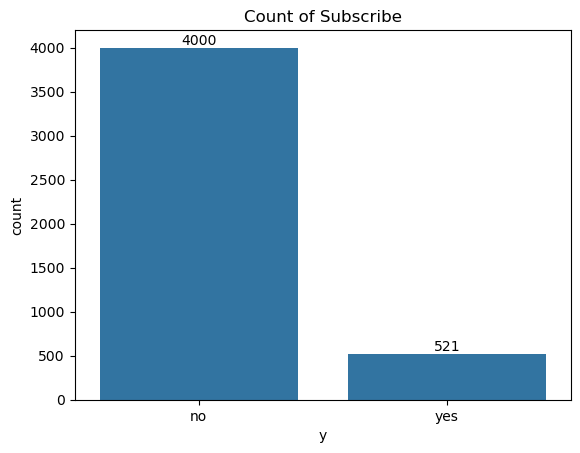

In [33]:
# show how many count of subsribe (yes and no)
ax = sns.countplot(data=df, x='y')
plt.title('Count of Subscribe')

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container)
plt.show()

# it show that the taget feature is imbalance

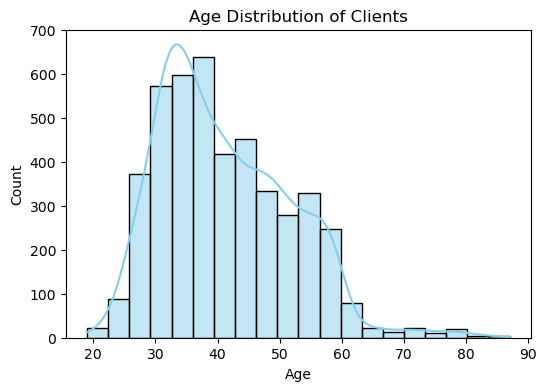

In [34]:
# Age Distribution

plt.figure(figsize=(6,4))
sns.histplot(df["age"], bins=20, kde=True, color="skyblue")
plt.title("Age Distribution of Clients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Most clients are aged between 30–50 years, the distribution is right-skewed
# Meaning younger and middle-aged clients dominate

C:\Users\Ilham Fadhilah\AppData\Local\Temp\ipykernel_21028\2190345792.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='y', y='duration', data=df, palette="pastel")


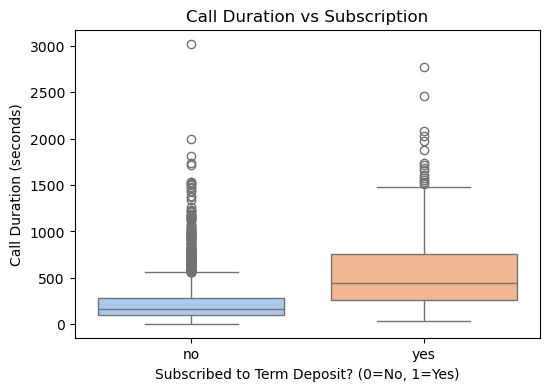

In [58]:
# Duration vs Subscription

plt.figure(figsize=(6,4))
sns.boxplot(x='y', y='duration', data=df, palette="pastel")
plt.title("Call Duration vs Subscription")
plt.xlabel("Subscribed to Term Deposit? (0=No, 1=Yes)")
plt.ylabel("Call Duration (seconds)")
plt.show()

# Clients with longer call durations are much more likely to subscribe
# This suggests that meaningful, longer interactions improve campaign success

### Encode Categorical Variables

In [36]:
# duplicate df
df_encoded = df.copy()

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# 1. One-Hot Encoding
# Columns: y (target), default, housing,loan

one_hot_map = {
    'y': {'no': 0, 'yes': 1},
    'default': {'no': 0, 'yes': 1},
    'housing': {'no': 0, 'yes': 1},
    'loan': {'no': 0, 'yes': 1},
}

for col, mapping in one_hot_map.items():
    df_encoded[col] = df_encoded[col].map(mapping)


# 2. Nominal Encoding
nominal_cols = ['contact', 'job', 'marital','poutcome']
encoder = OrdinalEncoder()
df_encoded[nominal_cols] = encoder.fit_transform(df_encoded[nominal_cols])

# 3. Ordinal Encoding
Month_mapping = {
    'jan': 0,
    'feb': 1,
    'mar': 2,
    'apr': 3,
    'may': 4,
    'jun': 5,
    'jul': 6,
    'aug': 7,
    'sep': 8,
    'oct': 9,
    'nov': 10,
    'dec': 11
}
df_encoded['month'] = df_encoded['month'].map(Month_mapping)

Education_mapping = {
    'unknown': 0,
    'primary': 1,
    'secondary': 2,
    'tertiary': 3
}

df_encoded['education'] = df_encoded['education'].map(Education_mapping)


# Build a mapping dictionary
encode_dict = {}

for col, cats in zip(nominal_cols, encoder.categories_):
    encode_dict[col] = {category: int(code) for code, category in enumerate(cats)}

# Show the full dictionary
import pprint
pprint.pprint(encode_dict)

df_encoded.sample(n = 5)

{'contact': {'cellular': 0, 'telephone': 1, 'unknown': 2},
 'job': {'admin.': 0,
         'blue-collar': 1,
         'entrepreneur': 2,
         'housemaid': 3,
         'management': 4,
         'retired': 5,
         'self-employed': 6,
         'services': 7,
         'student': 8,
         'technician': 9,
         'unemployed': 10,
         'unknown': 11},
 'marital': {'divorced': 0, 'married': 1, 'single': 2},
 'poutcome': {'failure': 0, 'other': 1, 'success': 2, 'unknown': 3}}


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3185,42,0.0,1.0,2,0,529,1,1,0.0,19,10,193,3,-1,0,3.0,0
2585,60,4.0,1.0,1,0,4895,0,0,2.0,9,5,313,1,-1,0,3.0,0
2786,28,1.0,2.0,2,0,6307,1,0,2.0,28,4,615,1,-1,0,3.0,0
3739,41,4.0,1.0,3,0,437,1,0,2.0,3,5,14,21,-1,0,3.0,0
1980,56,0.0,1.0,0,0,2038,0,0,0.0,8,1,405,1,305,1,2.0,0


### Seperate Features and Target

In [37]:
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

In [38]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,10.0,1.0,1,0,1787,0,0,0.0,19,9,79,1,-1,0,3.0
1,33,7.0,1.0,2,0,4789,1,1,0.0,11,4,220,1,339,4,0.0
2,35,4.0,2.0,3,0,1350,1,0,0.0,16,3,185,1,330,1,0.0
3,30,4.0,1.0,3,0,1476,1,1,2.0,3,5,199,4,-1,0,3.0
4,59,1.0,1.0,2,0,0,1,0,2.0,5,4,226,1,-1,0,3.0


In [39]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

### Split Data

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [41]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((3164, 16), (1357, 16))

In [42]:
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
565,40,9.0,1.0,2,0,56,1,1,0.0,29,0,194,1,247,1,0.0
3480,47,7.0,1.0,2,0,440,1,0,2.0,12,5,91,1,-1,0,3.0
2125,52,9.0,1.0,2,0,3554,0,1,0.0,8,6,89,1,-1,0,3.0
3452,31,0.0,1.0,2,0,0,1,0,0.0,29,6,82,5,-1,0,3.0
1667,33,1.0,1.0,2,0,-346,1,1,2.0,23,4,29,3,-1,0,3.0


In [43]:
X_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
4274,35,1.0,1.0,1,0,378,1,0,2.0,16,4,427,3,-1,0,3.0
72,31,4.0,2.0,3,0,6248,1,0,2.0,9,4,154,2,-1,0,3.0
1065,30,10.0,1.0,3,0,0,1,0,0.0,18,10,756,1,-1,0,3.0
3185,42,0.0,1.0,2,0,529,1,1,0.0,19,10,193,3,-1,0,3.0
130,41,1.0,1.0,1,0,168,1,0,0.0,18,10,187,3,-1,0,3.0


<br>

# **Part B – Model Development**

### Decision Tree Classifier

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

y_pred_train = tree.predict(X_train)
y_pred_test = tree.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2810
           1       1.00      1.00      1.00       354

    accuracy                           1.00      3164
   macro avg       1.00      1.00      1.00      3164
weighted avg       1.00      1.00      1.00      3164


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      1190
           1       0.41      0.44      0.42       167

    accuracy                           0.85      1357
   macro avg       0.66      0.68      0.67      1357
weighted avg       0.86      0.85      0.85      1357



The score are not good because imbalance dataset. So we do Oversampling to solve imbalance.

### Oversampling Using SMOTENC

In [45]:
# using SMOTE-NC for dataset containing numerical and categorical features.

from imblearn.over_sampling import SMOTENC

# we should define the categorical features first to make oversampling more accurate
categorical_features = [
    'job',
    'marital',
    'education',
    'default',
    'housing',
    'loan',
    'contact',
    'month',
    'day',
    'poutcome'
]

smotenc = SMOTENC(categorical_features=categorical_features, random_state=42)
X_resampled, y_resampled = smotenc.fit_resample(X, y)

# dont forget to always do partitioning AFTER undersampling/oversampling
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=0)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((5600, 16), (2400, 16))

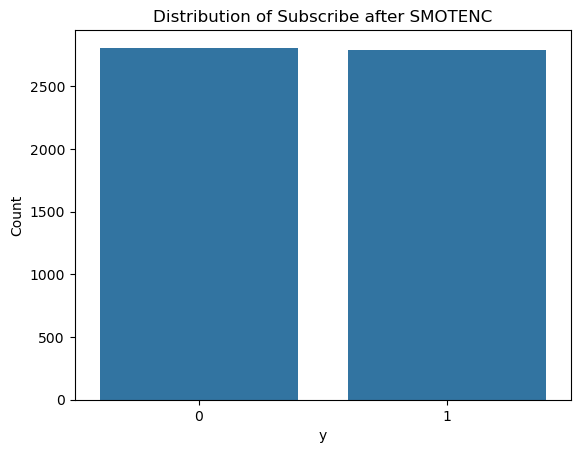

In [46]:
# just to visualize the distribution of target class after SMOTENC

sns.countplot(x=y_train)
plt.title('Distribution of Subscribe after SMOTENC')
plt.xlabel('y')
plt.ylabel('Count')
plt.show()

In [47]:
# BUILD CLASSIFICATION MODEL
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

y_pred_train = tree.predict(X_train)
y_pred_test = tree.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2808
           1       1.00      1.00      1.00      2792

    accuracy                           1.00      5600
   macro avg       1.00      1.00      1.00      5600
weighted avg       1.00      1.00      1.00      5600


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1192
           1       0.87      0.87      0.87      1208

    accuracy                           0.87      2400
   macro avg       0.87      0.87      0.87      2400
weighted avg       0.87      0.87      0.87      2400



These are default matrix. to improve we do k fold and hyperparameter

### K Fold

In [48]:
# Lets split the data into 5 folds.
# We will use this 'kf'(KFold splitting stratergy) object as input to cross_val_score() method
# The folds are made by preserving the percentage of samples for each class.
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
# split() method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1

Fold:1, Train set: 3616, Test set:905
Fold:2, Train set: 3617, Test set:904
Fold:3, Train set: 3617, Test set:904
Fold:4, Train set: 3617, Test set:904
Fold:5, Train set: 3617, Test set:904


In [49]:
from sklearn.tree import DecisionTreeClassifier

score = cross_val_score(DecisionTreeClassifier(random_state= 42), X, y, cv= kf, scoring="f1")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.42364532 0.39772727 0.43601896 0.45021645 0.38888889]
Average score: 0.42


### Hyperparameter

In [50]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to tune the hyperparameters
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'random_state': [0, 41, 42]
}

dtree_clf = DecisionTreeClassifier() # Initialize a decision tree classifier
grid_search = GridSearchCV(estimator=dtree_clf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='f1') # Use f1 scoring for classification
grid_search.fit(X_train, y_train)

best_dtree_clf = grid_search.best_estimator_ # Get the best estimator from the grid search
y_pred_test = best_dtree_clf.predict(X_test)

print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation f1 score: {:.3f}".format(grid_search.best_score_))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameters:  {'criterion': 'gini', 'max_depth': 10, 'random_state': 41}
Best cross-validation f1 score: 0.872


In [51]:
best_params = grid_search.best_params_

final_tree = DecisionTreeClassifier(**best_params)
final_tree.fit(X_train, y_train)

y_pred_train = final_tree.predict(X_train)
y_pred_test  = final_tree.predict(X_test)

from sklearn.metrics import classification_report
print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      2808
           1       0.93      0.94      0.94      2792

    accuracy                           0.94      5600
   macro avg       0.94      0.94      0.94      5600
weighted avg       0.94      0.94      0.94      5600


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1192
           1       0.86      0.86      0.86      1208

    accuracy                           0.86      2400
   macro avg       0.86      0.86      0.86      2400
weighted avg       0.86      0.86      0.86      2400



### Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)

# Train the model using the resampled data
rf_clf.fit(X_train, y_train)

# Make predictions on the training and test sets
y_pred_train_rf = rf_clf.predict(X_train)
y_pred_test_rf = rf_clf.predict(X_test)

# Print classification reports
print("\n=== Classification Report (Training Set - Random Forest) ===")
print(classification_report(y_train, y_pred_train_rf))

print("\n=== Classification Report (Test Set - Random Forest) ===")
print(classification_report(y_test, y_pred_test_rf))


=== Classification Report (Training Set - Random Forest) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2808
           1       1.00      1.00      1.00      2792

    accuracy                           1.00      5600
   macro avg       1.00      1.00      1.00      5600
weighted avg       1.00      1.00      1.00      5600


=== Classification Report (Test Set - Random Forest) ===
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1192
           1       0.92      0.94      0.93      1208

    accuracy                           0.93      2400
   macro avg       0.93      0.93      0.93      2400
weighted avg       0.93      0.93      0.93      2400



In [53]:
from sklearn.model_selection import KFold, cross_val_score

# Initialize KFold with the same parameters as before
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize Random Forest Classifier
rf_clf_kf = RandomForestClassifier(random_state=42)

# Perform cross-validation
score_rf = cross_val_score(rf_clf_kf, X_resampled, y_resampled, cv=kf, scoring="f1")

print(f'Scores for each fold are: {score_rf}')
print(f'Average score: {"{:.2f}".format(score_rf.mean())}')

Scores for each fold are: [0.92260442 0.93177628 0.93900185 0.91342535 0.93528694]
Average score: 0.93


In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid to tune the hyperparameters for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'random_state': [42]
}

rf_clf_tuning = RandomForestClassifier() # Initialize a Random Forest classifier
grid_search_rf = GridSearchCV(estimator=rf_clf_tuning, param_grid=param_grid_rf,
                           cv=5, n_jobs=-1, verbose=2, scoring='f1') # Use f1 scoring for classification

# Fit the grid search on the resampled training data
grid_search_rf.fit(X_train, y_train)

best_rf_clf = grid_search_rf.best_estimator_ # Get the best estimator from the grid search

print("Best parameters for Random Forest: ", grid_search_rf.best_params_)
print("Best cross-validation f1 score for Random Forest: {:.3f}".format(grid_search_rf.best_score_))

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
Best parameters for Random Forest:  {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200, 'random_state': 42}
Best cross-validation f1 score for Random Forest: 0.923


### XGboost

In [55]:
import xgboost as xgb

# Initialize XGBoost Classifier
xgb_clf = xgb.XGBClassifier(random_state=42)

# Train the model using the resampled data
xgb_clf.fit(X_train, y_train)

# Make predictions on the training and test sets
y_pred_train_xgb = xgb_clf.predict(X_train)
y_pred_test_xgb = xgb_clf.predict(X_test)

# Print classification reports
print("\n=== Classification Report (Training Set - XGBoost) ===")
print(classification_report(y_train, y_pred_train_xgb))

print("\n=== Classification Report (Test Set - XGBoost) ===")
print(classification_report(y_test, y_pred_test_xgb))


=== Classification Report (Training Set - XGBoost) ===
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2808
           1       0.99      1.00      1.00      2792

    accuracy                           1.00      5600
   macro avg       1.00      1.00      1.00      5600
weighted avg       1.00      1.00      1.00      5600


=== Classification Report (Test Set - XGBoost) ===
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      1192
           1       0.92      0.94      0.93      1208

    accuracy                           0.93      2400
   macro avg       0.93      0.93      0.93      2400
weighted avg       0.93      0.93      0.93      2400



In [56]:
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb

# Initialize KFold with the same parameters as before
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize XGBoost Classifier
xgb_clf_kf = xgb.XGBClassifier(random_state=42)

# Perform cross-validation
score_xgb = cross_val_score(xgb_clf_kf, X_resampled, y_resampled, cv=kf, scoring="f1")

print(f'Scores for each fold are: {score_xgb}')
print(f'Average score: {"{:.2f}".format(score_xgb.mean())}')

Scores for each fold are: [0.93580247 0.93677103 0.93950617 0.92852704 0.94275274]
Average score: 0.94


<br>

# **Part C – Model Evaluation**

In [57]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define the parameter grid to tune the hyperparameters for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'random_state': [42]
}

xgb_clf_tuning = xgb.XGBClassifier() # Initialize an XGBoost classifier
grid_search_xgb = GridSearchCV(estimator=xgb_clf_tuning, param_grid=param_grid_xgb,
                           cv=5, n_jobs=-1, verbose=2, scoring='f1') # Use f1 scoring for classification

# Fit the grid search on the resampled training data
grid_search_xgb.fit(X_train, y_train)

best_xgb_clf = grid_search_xgb.best_estimator_ # Get the best estimator from the grid search

print("Best parameters for XGBoost: ", grid_search_xgb.best_params_)
print("Best cross-validation f1 score for XGBoost: {:.3f}".format(grid_search_xgb.best_score_))

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


c:\Conda\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters for XGBoost:  {'colsample_bytree': 0.7, 'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 200, 'random_state': 42, 'subsample': 0.8}
Best cross-validation f1 score for XGBoost: 0.936


                  Accuracy Precision Recall F1-score
    Decision Tree 87       87        87     87
    Random Forest 93       93        93     93
    XGBoost       93       93        93     93


<br>

# **Part D – Discussion & Insights**

**Which model performed best overall?**
- Random Forest and XGBoost 
<br><br>

**Did ensemble methods (RF, XGBoost) improve performance compared to a single Decision Tree?**
- Yes, both Random Forest and XGBoost showed significant improvement in performance compared to the single Decision Tree Classifier, especially after addressing the class imbalance with SMOTENC. The F1 scores for the ensemble methods were around 0.93-0.94 on the resampled data 
<br><br>

**How could the bank use these insights to refine its marketing strategy?**
- Target customers more effectively: The models can predict which customers are more likely to subscribe to a term deposit. The bank can focus its marketing efforts on these high-potential customers, optimizing resource allocation.
- Personalize marketing campaigns: By analyzing the features that are most important for predicting subscription (which can be obtained from the best performing model), the bank can tailor their marketing messages and offers to specific customer segments. For example, if 'duration' is a key feature, the bank might focus on strategies that encourage longer, more engaging interactions with potential customers.
- Improve campaign timing and contact methods: Features like 'month', 'day', and 'contact' also play a role in predicting subscription. The bank can use this information to identify the best times and channels to reach out to customers.
- Assess the impact of previous campaigns: The 'poutcome' and 'previous' features provide information about the results of past marketing efforts. This can help the bank understand what worked and what didn't, and adjust their strategies accordingly.
- Proactively identify customers less likely to subscribe: The models can also identify customers who are unlikely to subscribe. The bank can avoid spending resources on these customers or try a different approach altogether.
- Evaluate the effectiveness of new marketing initiatives: By monitoring the performance of the models on new data, the bank can assess whether new marketing strategies are having a positive impact on subscription rates.